<a href="https://colab.research.google.com/github/shalinivaggu/credit_fraud/blob/main/creditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#step 1 : Installation and setup


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn==1.2.2 xgboost --upgrade
!pip install --upgrade scikit-learn imbalanced-learn
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl.metadata (8.2 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 M

#step-2: Importing the dataset from kaggle to google colab

In [ ]:
#install kaggle API
! pip install kaggle

In [ ]:
#create a directory as kaggle
! mkdir -p ~/.kaggle

In [ ]:
#import kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
# copy API key to kaggle directory
!cp kaggle.json ~/.kaggle

In [ ]:
#disable the API key
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#list of datasets
! kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
anandshaw2001/netflix-movies-and-tv-shows                     Netflix Movies and TV Shows                          1MB  2025-01-03 10:33:01           9003        245  1.0              
ankushpanday1/global-road-accidents-dataset                   Global Road Accidents Dataset                       12MB  2025-01-25 04:22:29            779         25  1.0              
huzpsb/cybersecurity-incidents-dataset                        Cybersecurity Incidents Dataset                      6KB  2025-01-24 06:18:11            785         22  1.0              
oktayrdeki/traffic-accidents                                  Traffic Accid

In [ ]:
#import the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# unzipping dataset
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
dataset_1 = pd.read_csv('/content/creditcard.csv')

In [ ]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#**MODEL FOR OVERSAMPLING**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:

# 1. Load the Kaggle dataset
data = pd.read_csv('/content/creditcard.csv')  #  downloaded the dataset

print(dataset_1.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
dataset_1.dropna(inplace=True)

In [ ]:
# 4. Now, proceed with creating the balanced dataset as before:
# (Code from the previous response)
fraud_transactions = dataset_1[dataset_1['Class'] == 1]
non_fraud_transactions = dataset_1[dataset_1['Class'] == 0]
print(fraud_transactions.shape)
print(non_fraud_transactions.shape)

(492, 31)
(284315, 31)


In [ ]:
num_non_fraud_to_keep = len(fraud_transactions) * 9  # Adjust the multiplier as needed
non_fraud_subset = non_fraud_transactions.sample(n=num_non_fraud_to_keep, random_state=42)

# Combine the fraud and reduced non-fraud samples to create the balanced dataset
balanced_data = pd.concat([fraud_transactions, non_fraud_subset])

# Shuffle the data to ensure randomness (important for some algorithms)
data = balanced_data.sample(frac=1, random_state=42)
print(data.shape)

(4920, 31)


In [ ]:

# 2. Data Exploration and Preprocessing
# Standardize the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# 3. Split the Dataset
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# Reshape for CNN (CNNs expect 3D input)
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# --- Define CNN Model ---
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

# Compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=25, validation_data=(X_val_cnn, y_val))

# --- Random Forest Model ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- XGBoost Model ---
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# 5. Model Evaluation
def evaluate_model(model, X_test, y_test):
    if isinstance(model, tf.keras.Model):
        y_pred = (model.predict(X_test) > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

# Evaluate models
print("CNN Model Evaluation:")
evaluate_model(model, X_test_cnn, y_test)

print("\nRandom Forest Model Evaluation:")
evaluate_model(rf_model, X_test, y_test)

print("\nXGBoost Model Evaluation:")
evaluate_model(xgb_model, X_test, y_test)

print("Model Training Complete. Models Available: CNN, Random Forest, XGBoost.")

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8376 - loss: 73.1188 - val_accuracy: 0.8963 - val_loss: 51.8508
Epoch 2/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8550 - loss: 39.9975 - val_accuracy: 0.9075 - val_loss: 63.8170
Epoch 3/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8757 - loss: 26.3982 - val_accuracy: 0.9258 - val_loss: 14.4108
Epoch 4/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8530 - loss: 23.2480 - val_accuracy: 0.9319 - val_loss: 4.3048
Epoch 5/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8893 - loss: 24.4975 - val_accuracy: 0.9258 - val_loss: 3.1926
Epoch 6/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8931 - loss: 10.6223 - val_accuracy: 0.9350 - val_loss: 12.3634
Epoch 7/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9287 - loss: 4.4042 - val_accuracy: 0.9512 - val_loss: 2.9900
Epoch 8/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9230 - loss: 11.6444 - val_accuracy: 0.9593 - val_loss:



**Confusion Matrix**

The confusion matrix provides insight into the true positives, true negatives, false positives, and false negatives.

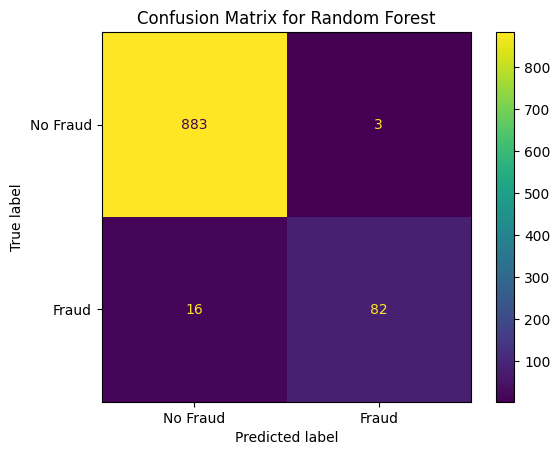

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fraud', 'Fraud'])
    disp.plot(cmap='viridis')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Example for Random Forest
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest")


**ROC CURVE**

The Receiver Operating Characteristic (ROC) curve shows the trade-off between true positive rate (sensitivity) and false positive rate.


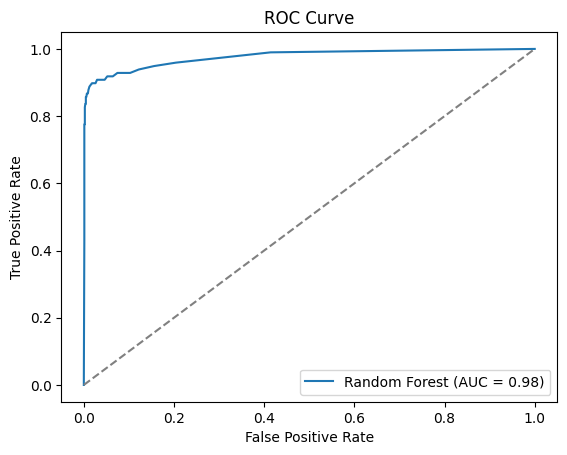

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]  # Use probabilities for positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Example for Random Forest
plot_roc_curve(rf_model, X_test, y_test, "Random Forest")


**Precision-Recall Curve**

The precision-recall curve is particularly useful for imbalanced datasets like fraud detection.


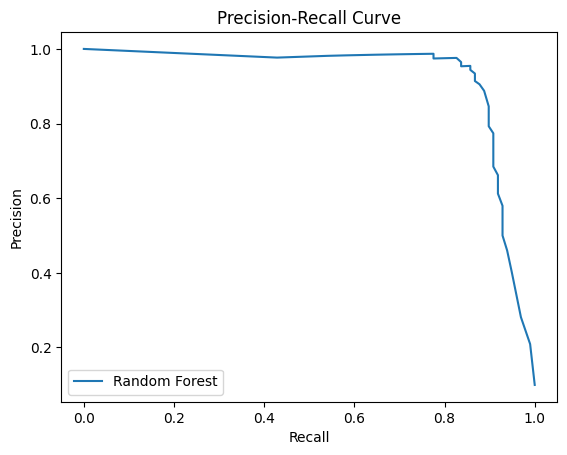

In [ ]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    plt.figure()
    plt.plot(recall, precision, label=model_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Example for Random Forest
plot_precision_recall_curve(rf_model, X_test, y_test, "Random Forest")


**Feature Importance**

For models like Random Forest or XGBoost, you can plot the importance of each feature.



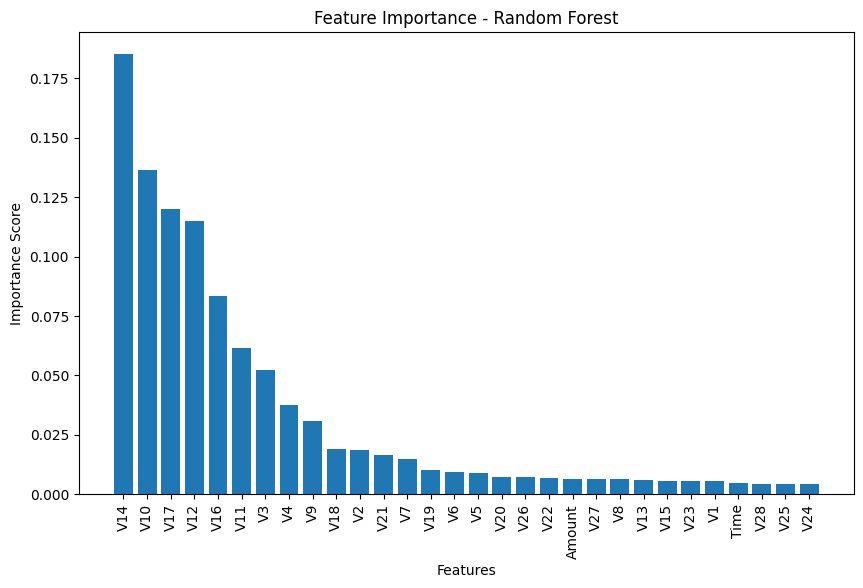

In [ ]:
def plot_feature_importance(model, feature_names, model_name):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importance)), importance[indices], align="center")
    plt.xticks(range(len(importance)), [feature_names[i] for i in indices], rotation=90)
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Features")
    plt.ylabel("Importance Score")
    plt.show()

# Example for Random Forest
plot_feature_importance(rf_model, X.columns, "Random Forest")


**Learning Curve**

To analyze overfitting or underfitting, plot the training and validation loss/accuracy over epochs for the CNN model.

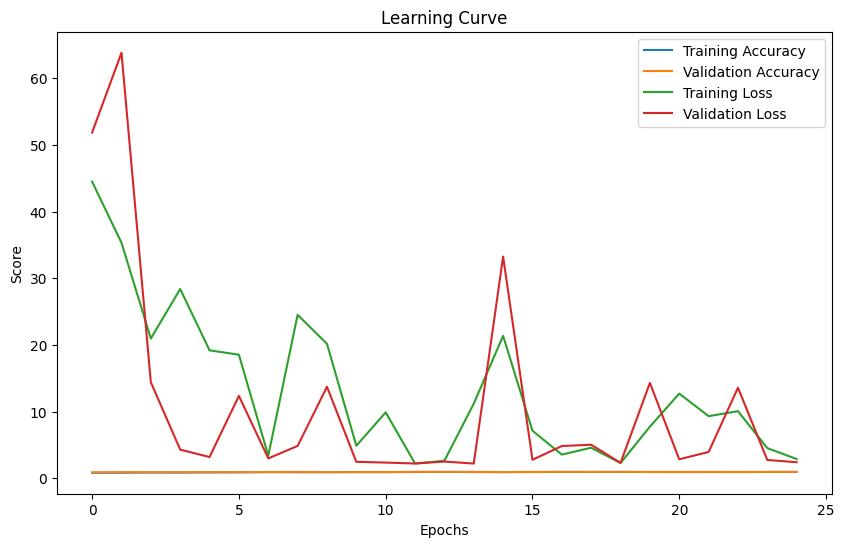

In [ ]:
def plot_learning_curve(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

# Example for CNN Model
plot_learning_curve(history)


 **Distribution of Predictions**

Visualize the predicted probabilities for fraud and non-fraud cases.

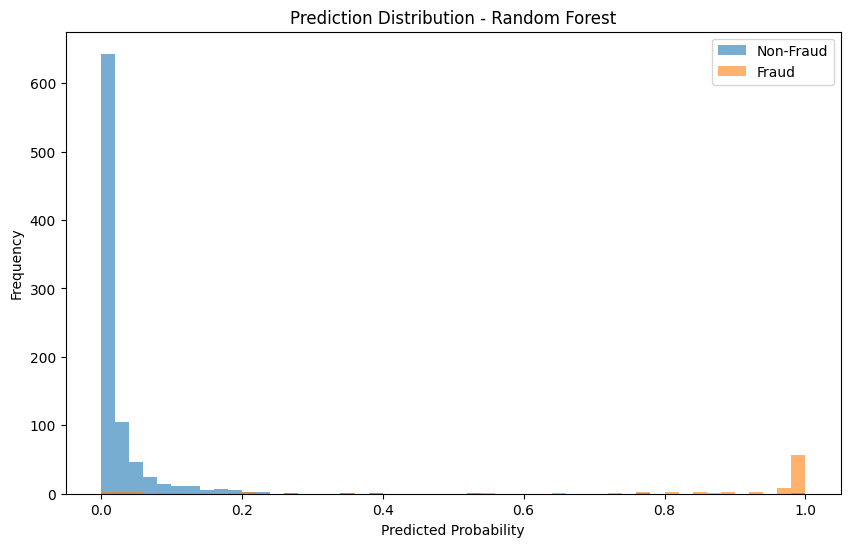

In [ ]:
def plot_prediction_distribution(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    plt.figure(figsize=(10, 6))
    plt.hist(y_prob[y_test == 0], bins=50, alpha=0.6, label='Non-Fraud')
    plt.hist(y_prob[y_test == 1], bins=50, alpha=0.6, label='Fraud')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title(f"Prediction Distribution - {model_name}")
    plt.legend()
    plt.show()

# Example for Random Forest
plot_prediction_distribution(rf_model, X_test, y_test, "Random Forest")

**Classification Report**

Print a detailed classification report showing precision, recall, F1-score, and support.

In [ ]:
from sklearn.metrics import classification_report

def print_classification_report(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud']))

# Example for Random Forest
print_classification_report(rf_model, X_test, y_test)


              precision    recall  f1-score   support

    No Fraud       0.98      1.00      0.99       886
       Fraud       0.96      0.84      0.90        98

    accuracy                           0.98       984
   macro avg       0.97      0.92      0.94       984
weighted avg       0.98      0.98      0.98       984




###1. **Model Hyperparameter Tuning**


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5, 6],
              'learning_rate': [0.01, 0.1, 0.3]}

# Create your XGBoost model before using it in RandomizedSearchCV
xgb_model = xgb.XGBClassifier()  # Or any other XGBoost model

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=3)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

{'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1}


###2. **Handling Class Imbalance**




In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Retrain the model on the resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

### 4. Advanced Model Architecture (Deep Learning)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, Flatten, Dense, Reshape # Import Reshape

model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_cnn, y_train, epochs=25, validation_data=(X_val_cnn, y_val))

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9462 - loss: 0.1649 - val_accuracy: 0.9807 - val_loss: 0.1029
Epoch 2/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9825 - loss: 0.0726 - val_accuracy: 0.9797 - val_loss: 0.0793
Epoch 3/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9806 - loss: 0.0717 - val_accuracy: 0.9787 - val_loss: 0.0730
Epoch 4/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9824 - loss: 0.0634 - val_accuracy: 0.9787 - val_loss: 0.0724
Epoch 5/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9843 - loss: 0.0545 - val_accuracy: 0.9817 - val_loss: 0.0728
Epoch 6/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9791 - loss: 0.0677 - val_accuracy: 0.9817 - val_loss: 0.0718
Epoch 7/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.0666 - val_accuracy: 0.9776 - val_loss: 0.0770
Epoch 8/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9835 - loss: 0.0616 - val_accuracy: 0.9797 - val_loss: 0.0731
Epo

### 6. Model summary.



In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)                    │ (None, 28, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 14, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 448)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │          28,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,045 (340.02 KB)

 Trainable params: 28,993 (113.25 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 57,988 (226.52 KB)

### 7. Model Comparison and Ensemble



In [ ]:
!pip install scikeras

In [ ]:
xgb_model = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.3, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report


# Wrap your CNN model
cnn_clf = KerasClassifier(model=model, epochs=10, batch_size=32, verbose=0)

# Combine models
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('cnn', cnn_clf),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate voting classifier
y_pred = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       886
           1       0.98      0.83      0.90        98

    accuracy                           0.98       984
   macro avg       0.98      0.91      0.94       984
weighted avg       0.98      0.98      0.98       984



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1])
print("ENcembled model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

def evaluate_model(model, X_test, y_test):
    if isinstance(model, tf.keras.Model):
        y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

# Evaluate models
print("CNN Model Evaluation:")
evaluate_model(model, X_test_cnn, y_test)

print("\nRandom Forest Model Evaluation:")
evaluate_model(rf_model, X_test, y_test)

print("\nXGBoost Model Evaluation:")
evaluate_model(xgb_model, X_test, y_test)

ENcembled model:
Accuracy: 0.9807
Precision: 0.9759
Recall: 0.8265
F1-Score: 0.8950
AUC: 0.9778
CNN Model Evaluation:
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.9797
Precision: 0.9756
Recall: 0.8163
F1-Score: 0.8889
AUC: 0.9070

Random Forest Model Evaluation:
Accuracy: 0.9797
Precision: 0.9333
Recall: 0.8571
F1-Score: 0.8936
AUC: 0.9252

XGBoost Model Evaluation:
Accuracy: 0.9776
Precision: 0.9318
Recall: 0.8367
F1-Score: 0.8817
AUC: 0.9150


In [ ]:
import joblib

joblib.dump(rf_model, 'rf_model.pkl')  # Save the model
loaded_model = joblib.load('rf_model.pkl')  # Load the model


joblib.dump(rf_model, 'xgb_model.pkl')  # Save the model
loaded_model = joblib.load('xgb_model.pkl')  # Load the model

# Saving the CNN model
model.save('cnn_model.h5')  # Saves the model to an HDF5 file

# Loading the CNN model
loaded_cnn_model = tf.keras.models.load_model('cnn_model.h5')

# Save the VotingClassifier model
joblib.dump(voting_clf, 'ensemble_model.pkl')

['ensemble_model.pkl']

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
               Accuracy  Precision    Recall  F1-Score       AUC
CNN            0.979675   0.975610  0.816327  0.888889  0.907035
Random Forest  0.979675   0.933333  0.857143  0.893617  0.925185
XGBoost        0.978659   0.932584  0.846939  0.887701  0.920083
Ensemble       0.980691   0.975904  0.826531  0.895028  0.912137


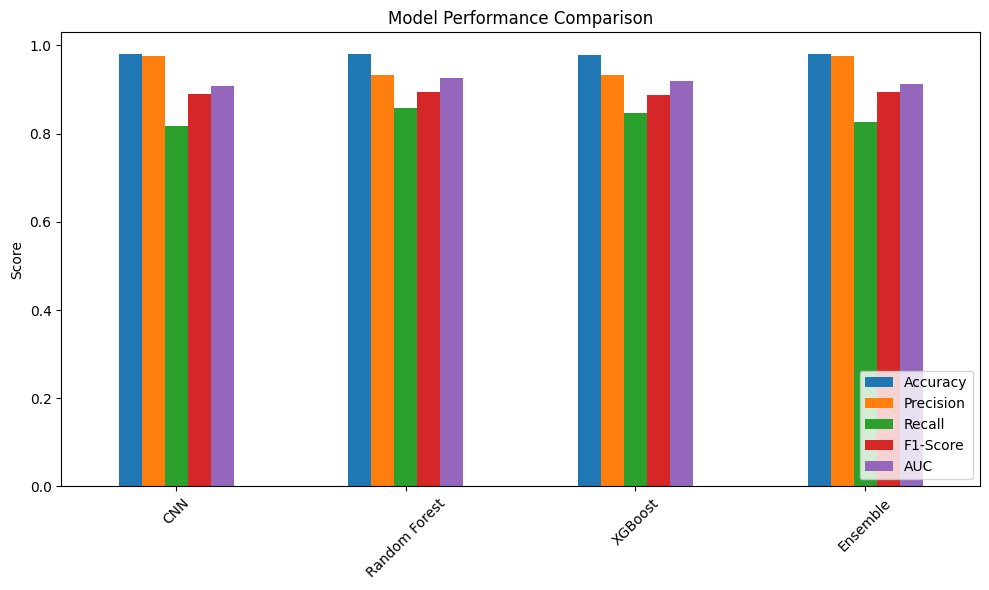

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


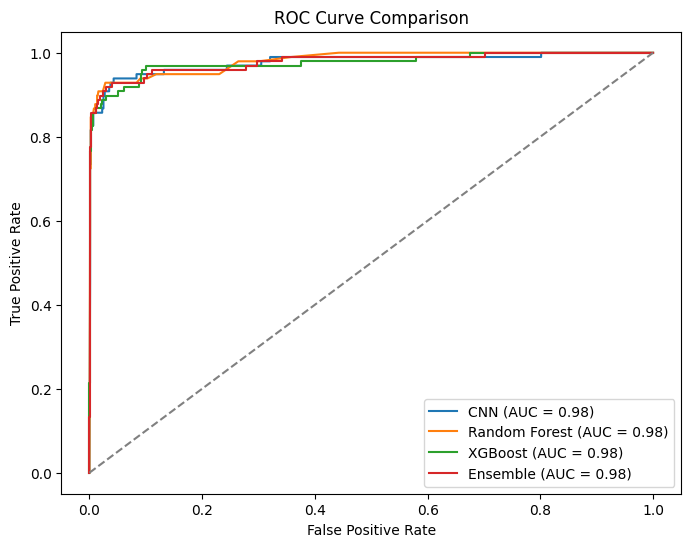

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


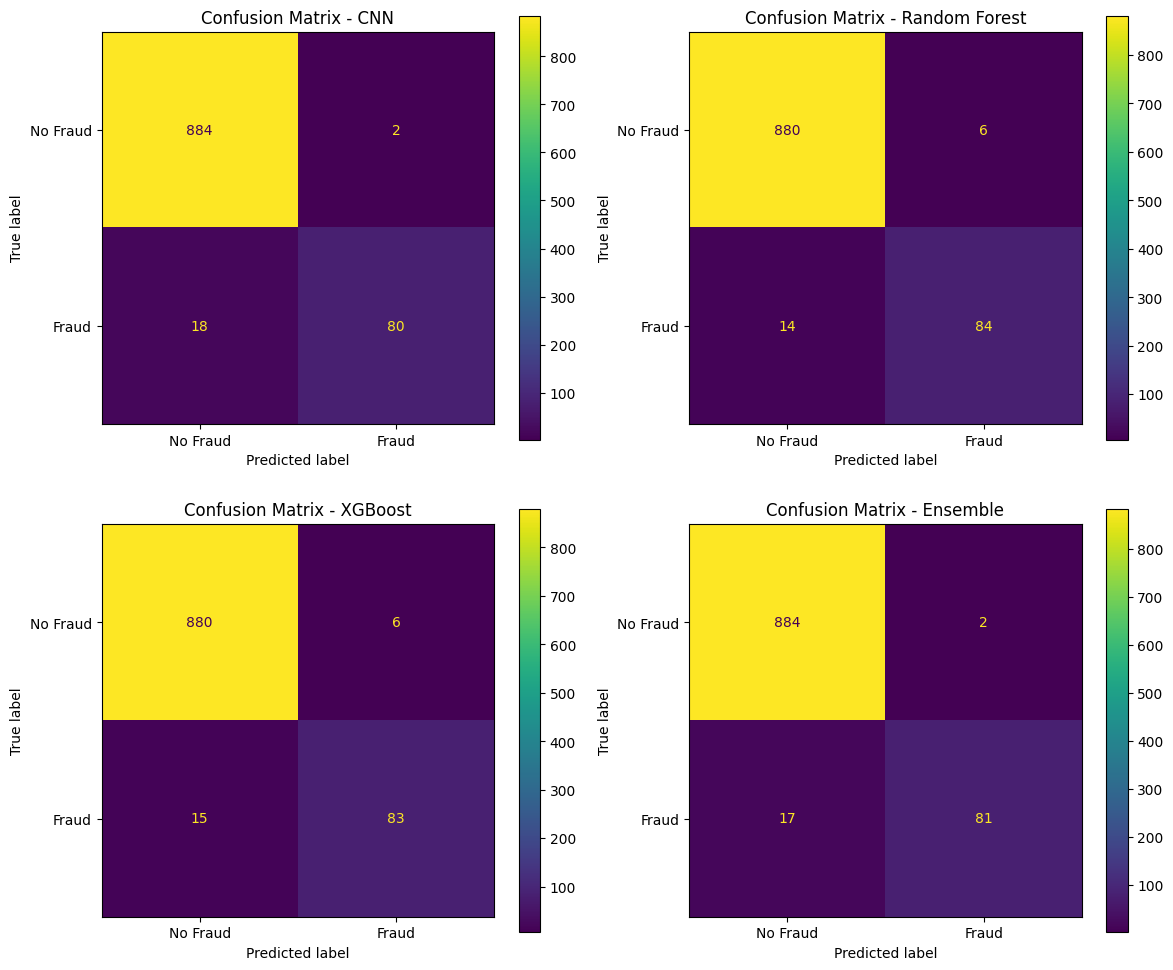

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier

# 1. Evaluate each model using relevant metrics
models = {
    "CNN": model,
    "Random Forest": rf_model,
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42).fit(X_train, y_train),  # Re-fit XGBoost
    "Ensemble": voting_clf
}

results = {}
for model_name, model in models.items():
    if model_name == "CNN":
        y_pred = (model.predict(X_test_cnn) > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)

    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_pred)
    }

# 2. Display the results in a table
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

# 3. Visualize the results
# a. Bar plot for comparing metrics
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# b. ROC curves for comparing models
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    if model_name == "CNN":
        y_prob = model.predict(X_test_cnn)
    else:
        y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# c. Confusion matrices for each model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (model_name, model) in enumerate(models.items()):
    if model_name == "CNN":
        y_pred = (model.predict(X_test_cnn) > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fraud', 'Fraud'])
    disp.plot(ax=axes[i], cmap='viridis')
    axes[i].set_title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()